In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [108]:
customers = pd.read_csv("./datasets/AWCustomers.csv")

In [109]:
customers["Title"].dropna(inplace=True)
customers.set_index("CustomerID", inplace=True)

In [110]:
customers.head()

,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated
CustomerID,,,,,,,,,,,,,,,,,,,,,
21173,NaN,Chad,C,Yuan,NaN,7090 C. Mount Hood,NaN,Wollongong,New South Wales,Australia,...,Bachelors,Clerical,M,M,1,3,0,1,81916,2017-03-06
13249,NaN,Ryan,NaN,Perry,NaN,3651 Willow Lake Rd,NaN,Shawnee,British Columbia,Canada,...,Partial College,Clerical,M,M,1,2,1,2,81076,2017-03-06
29350,NaN,Julia,NaN,Thompson,NaN,1774 Tice Valley Blvd.,NaN,West Covina,California,United States,...,Bachelors,Clerical,F,S,0,3,0,0,86387,2017-03-06
13503,NaN,Theodore,NaN,Gomez,NaN,2103 Baldwin Dr,NaN,Liverpool,England,United Kingdom,...,Partial College,Skilled Manual,M,M,1,2,1,2,61481,2017-03-06
22803,NaN,Marshall,J,Shan,NaN,Am Gallberg 234,NaN,Werne,Nordrhein-Westfalen,Germany,...,Partial College,Skilled Manual,M,S,1,1,0,0,51804,2017-03-06


In [111]:
sales = pd.read_csv("./datasets/AWSales.csv")

In [112]:
sales.set_index("CustomerID", inplace=True)

In [113]:
data = pd.merge(
    customers,
    sales,
    left_index=True,
    right_index=True,
)

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18361 entries, 21173 to 16676
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 101 non-null    object 
 1   FirstName             18361 non-null  object 
 2   MiddleName            10572 non-null  object 
 3   LastName              18361 non-null  object 
 4   Suffix                3 non-null      object 
 5   AddressLine1          18361 non-null  object 
 6   AddressLine2          311 non-null    object 
 7   City                  18361 non-null  object 
 8   StateProvinceName     18361 non-null  object 
 9   CountryRegionName     18361 non-null  object 
 10  PostalCode            18361 non-null  object 
 11  PhoneNumber           18361 non-null  object 
 12  BirthDate             18361 non-null  object 
 13  Education             18361 non-null  object 
 14  Occupation            18361 non-null  object 
 15  Gender              

In [115]:
data.shape

(18361, 25)

In [116]:
data["AddressLine2"].isna().sum()

np.int64(18050)

In [117]:
data.columns

Index(['Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'LastUpdated', 'BikeBuyer', 'AvgMonthSpend'],
      dtype='object')

In [118]:
data.drop(columns=["AddressLine2", "AddressLine1", "PhoneNumber"], inplace=True)

In [119]:
from scipy.stats import chi2_contingency


name_columns = ["FirstName", "MiddleName", "LastName"]

for col in name_columns:
    contingency_table = pd.crosstab(data[col], data["BikeBuyer"])

    if contingency_table.shape[0] < 2:
        print(f"⚠️ Skipping {col}: not enough unique values for chi-square test\n")
        continue

    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square Test for {col}:")
    print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}")

    if p < 0.05:
        print(
            "Significant relationship with BikeBuyer\n"
        )
    else:
        print("No significant relationship\n")

Chi-square Test for FirstName:
Chi2 = 879.58, p-value = 0.0000
Significant relationship with BikeBuyer

Chi-square Test for MiddleName:
Chi2 = 42.88, p-value = 0.4766
No significant relationship

Chi-square Test for LastName:
Chi2 = 382.40, p-value = 0.3710
No significant relationship



In [145]:
data.drop(columns=["MiddleName", "LastName"] , inplace=True)

In [121]:
data["Suffix"].isna().value_counts()

Suffix
True     18358
False        3
Name: count, dtype: int64

In [122]:
data.drop(columns=["Suffix"] , inplace=True)

In [123]:
data["BirthDate"] = pd.to_datetime(data["BirthDate"])

In [124]:
data["Education"].value_counts()

Education
Bachelors              5325
Partial College        5024
High School            3274
Graduate Degree        3163
Partial High School    1575
Name: count, dtype: int64

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18361 entries, 21173 to 16676
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Title                 101 non-null    object        
 1   FirstName             18361 non-null  object        
 2   MiddleName            10572 non-null  object        
 3   LastName              18361 non-null  object        
 4   City                  18361 non-null  object        
 5   StateProvinceName     18361 non-null  object        
 6   CountryRegionName     18361 non-null  object        
 7   PostalCode            18361 non-null  object        
 8   BirthDate             18361 non-null  datetime64[ns]
 9   Education             18361 non-null  object        
 10  Occupation            18361 non-null  object        
 11  Gender                18361 non-null  object        
 12  MaritalStatus         18361 non-null  object        
 13  HomeOwnerFlag    

Use missing indicator to salvage title column
> from sklearn.impute import MissingIndicator


In [126]:
data.drop(columns=["LastUpdated"], inplace=True)

In [127]:
data["BirthDate"]

CustomerID
21173   1987-11-13
13249   1972-07-21
29350   1985-11-09
13503   1977-10-18
22803   1975-02-05
           ...    
25414   1990-11-11
11459   1992-10-13
12160   1983-11-24
14353   1995-06-15
16676   1986-03-26
Name: BirthDate, Length: 18361, dtype: datetime64[ns]

In [128]:
from datetime import date

today = pd.to_datetime(date.today())

data["Age"] = today.year - data["BirthDate"].dt.year

In [129]:
data.drop(columns=["BirthDate"], inplace=True)

In [130]:
pd.crosstab(index=data["Age"], columns=data["BikeBuyer"]).T

Age,25,26,27,28,29,30,31,32,33,34,...,85,86,87,88,89,90,92,93,94,95
BikeBuyer,,,,,,,,,,,,,,,,,,,,,
0,150,196,238,218,251,292,327,335,265,283,...,2,2,0,1,3,1,1,2,2,1
1,103,124,151,167,176,182,184,202,288,307,...,1,1,2,0,0,0,2,0,0,0


In [131]:
data.columns

Index(['Title', 'FirstName', 'MiddleName', 'LastName', 'City',
       'StateProvinceName', 'CountryRegionName', 'PostalCode', 'Education',
       'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'BikeBuyer', 'AvgMonthSpend', 'Age'],
      dtype='object')

In [132]:
# 📊 Bike Buyer Analysis Report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (assuming already in DataFrame `data`)
# data = pd.read_csv("your_file.csv")

# ===== Basic Overview =====
print("===== Dataset Overview =====")
print(data.info(), "\n")
print("===== Descriptive Statistics =====")
print(data.describe(include='all').T, "\n")
print("===== Missing Values =====")
print(data.isnull().sum(), "\n")


===== Dataset Overview =====
<class 'pandas.core.frame.DataFrame'>
Index: 18361 entries, 21173 to 16676
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 101 non-null    object 
 1   FirstName             18361 non-null  object 
 2   MiddleName            10572 non-null  object 
 3   LastName              18361 non-null  object 
 4   City                  18361 non-null  object 
 5   StateProvinceName     18361 non-null  object 
 6   CountryRegionName     18361 non-null  object 
 7   PostalCode            18361 non-null  object 
 8   Education             18361 non-null  object 
 9   Occupation            18361 non-null  object 
 10  Gender                18361 non-null  object 
 11  MaritalStatus         18361 non-null  object 
 12  HomeOwnerFlag         18361 non-null  int64  
 13  NumberCarsOwned       18361 non-null  int64  
 14  NumberChildrenAtHome  18361 non-null  int6

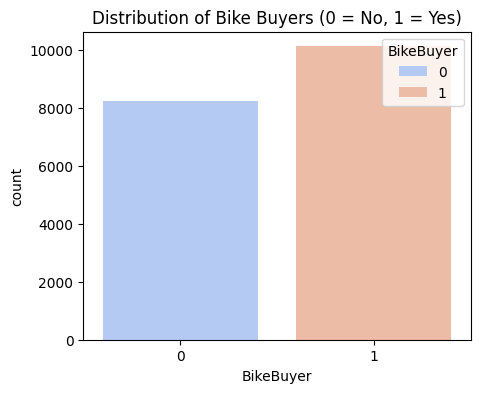

In [133]:
plt.figure(figsize=(5, 4))
sns.countplot(x="BikeBuyer", data=data, hue="BikeBuyer", palette="coolwarm")
plt.title("Distribution of Bike Buyers (0 = No, 1 = Yes)")
plt.show()

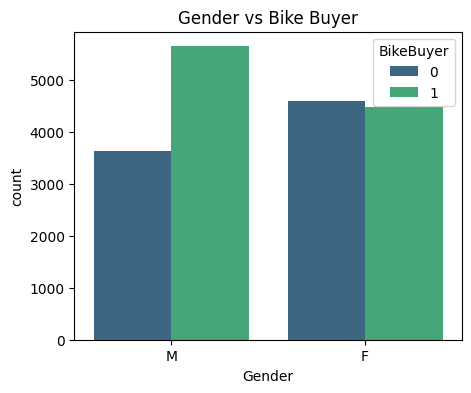

In [134]:
plt.figure(figsize=(5,4))
sns.countplot(x='Gender', hue='BikeBuyer', data=data, palette='viridis')
plt.title("Gender vs Bike Buyer")
plt.show()


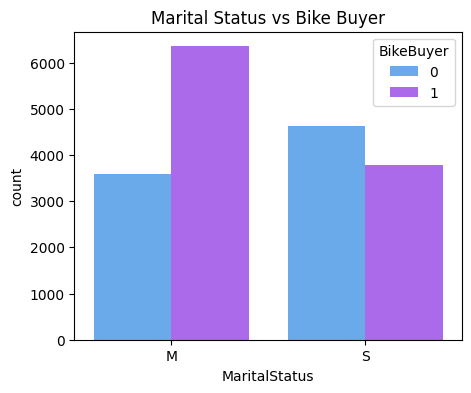

In [135]:
plt.figure(figsize=(5,4))
sns.countplot(x='MaritalStatus', hue='BikeBuyer', data=data, palette='cool')
plt.title("Marital Status vs Bike Buyer")
plt.show()


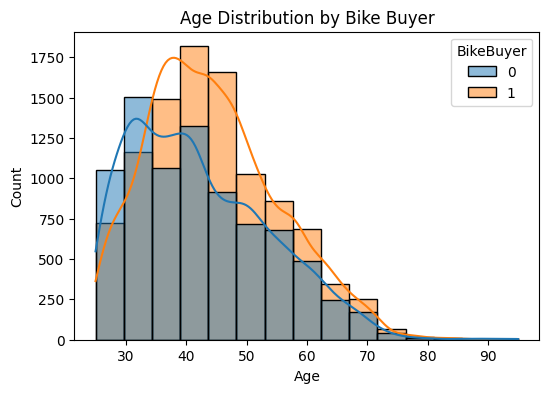

In [136]:
plt.figure(figsize=(6,4))
sns.histplot(data, x='Age', hue='BikeBuyer', kde=True, bins=15)
plt.title("Age Distribution by Bike Buyer")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_31196\3475424067.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BikeBuyer', y='YearlyIncome', data=data, palette='Set2')


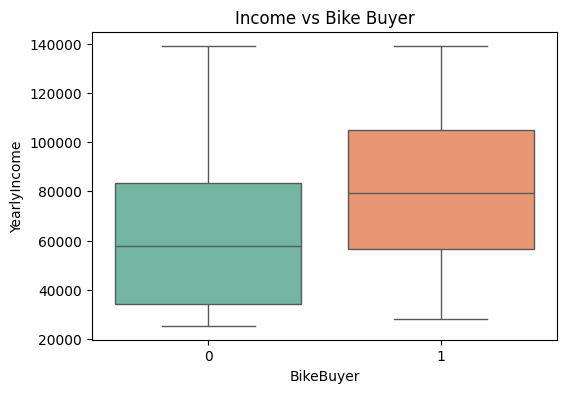

In [137]:
plt.figure(figsize=(6,4))
sns.boxplot(x='BikeBuyer', y='YearlyIncome', data=data, palette='Set2')
plt.title("Income vs Bike Buyer")
plt.show()


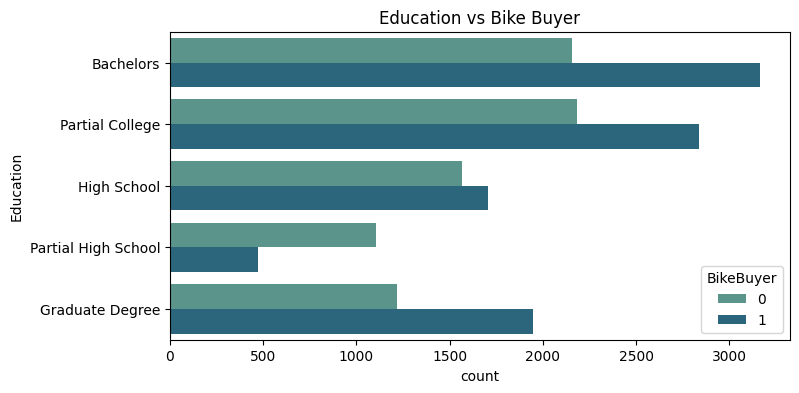

In [138]:
plt.figure(figsize=(8,4))
sns.countplot(y='Education', hue='BikeBuyer', data=data, palette='crest')
plt.title("Education vs Bike Buyer")
plt.show()


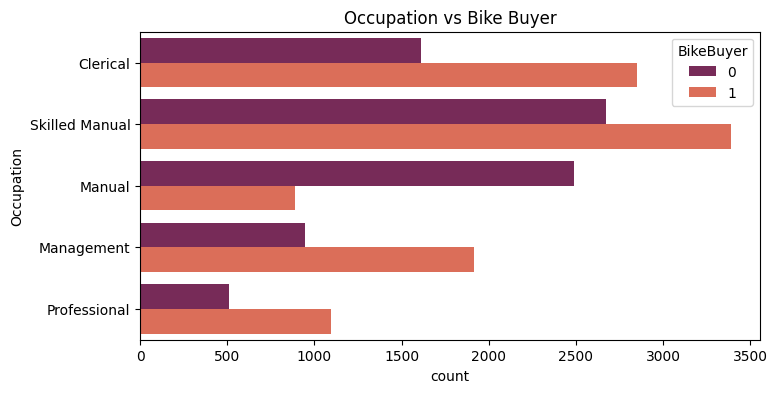

In [139]:
plt.figure(figsize=(8,4))
sns.countplot(y='Occupation', hue='BikeBuyer', data=data, palette='rocket')
plt.title("Occupation vs Bike Buyer")
plt.show()


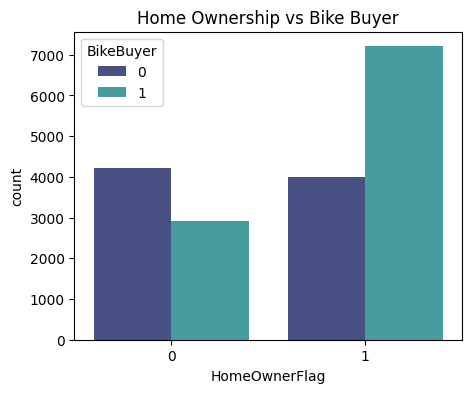

In [140]:
plt.figure(figsize=(5,4))
sns.countplot(x='HomeOwnerFlag', hue='BikeBuyer', data=data, palette='mako')
plt.title("Home Ownership vs Bike Buyer")
plt.show()


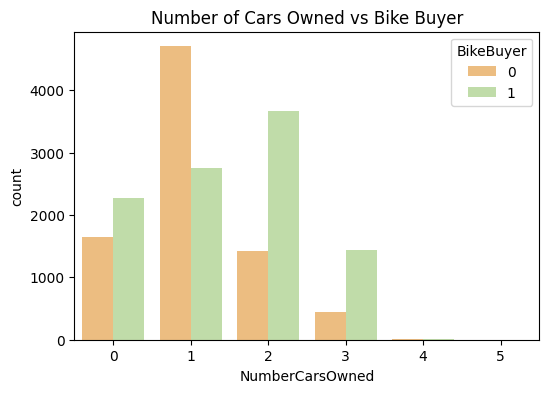

In [141]:
plt.figure(figsize=(6,4))
sns.countplot(x='NumberCarsOwned', hue='BikeBuyer', data=data, palette='Spectral')
plt.title("Number of Cars Owned vs Bike Buyer")
plt.show()


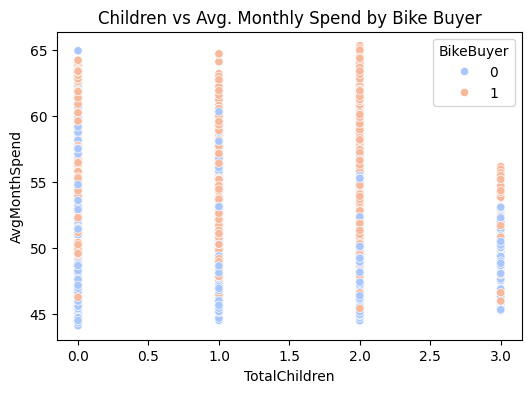

In [142]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='TotalChildren', y='AvgMonthSpend', hue='BikeBuyer', data=data, palette='coolwarm')
plt.title("Children vs Avg. Monthly Spend by Bike Buyer")
plt.show()


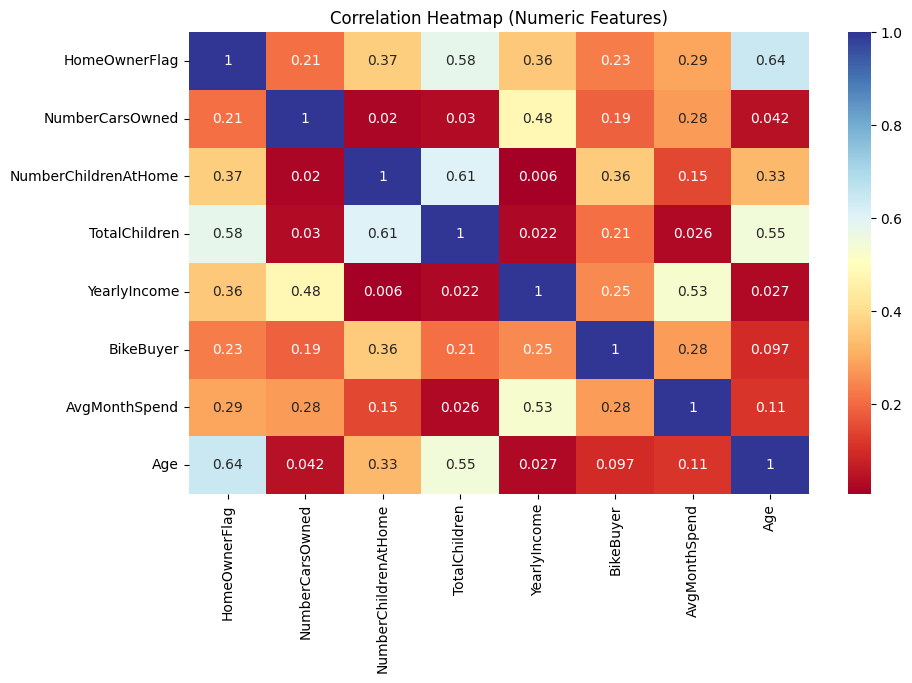

In [143]:
numeric_cols = data.select_dtypes(include='number')
plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='RdYlBu')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()




- Higher yearly income correlates with higher bike purchases.
- Bike buyers tend to be younger on average.
- Homeowners and those with fewer cars show higher bike buying rates.
- Gender and marital status show notable differences in buying behavior.
- Occupation and education level also influence purchase decisions.


1. Selected attributes

In [144]:
data.columns

Index(['Title', 'FirstName', 'MiddleName', 'LastName', 'City',
       'StateProvinceName', 'CountryRegionName', 'PostalCode', 'Education',
       'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'BikeBuyer', 'AvgMonthSpend', 'Age'],
      dtype='object')